In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(X, b, w):
  """Calculate the sigmoid function.

  Args:
    X: MxK ndarray of the input features. M: number of samples, K: number of features.
    b: bias.
    w: weights. ndarray of shape (K,).

  Returns:
    Sigmoid function value.
  """

  z = b + X @ w
  return 1 / (1 + np.exp(-z))


def logloss(y, X, b, w):
  """Calculate the log-loss.

  Args:
    y: 1D ndarray of the target variable.
    X: MxK ndarray of the input features. M: number of samples, K: number of features.
    b: bias.
    w: weights. ndarray of shape (K,).

  Returns:
    Log-loss.
  """

  y_hat = sigmoid(X, b, w)
  # When y_hat is almost equal to 0 or 1, log(y_hat) or log(1-y_hat) returns -inf.
  # To prevent this, subtract or add an infinitesimal value (epsilon) to y_hat
  # when it is close to 0 or 1.
  epsilon = 1.e-7
  y_hat = np.where(y_hat > 1 - epsilon, y_hat - epsilon, y_hat)
  y_hat = np.where(y_hat < epsilon, y_hat + epsilon, y_hat)

  loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
  return loss


def costfcn(y, X, b, w):
  """Calculate the log-loss cost function.

  Args:
    y: 1D ndarray of the target variable.
    X: MxK ndarray of the input features. M: number of samples, K: number of features.
    b: bias.
    w: weights. ndarray of shape (K,).

  Returns:
    Cost function value.
  """

  l = logloss(y, X, b, w)
  J = -np.mean(l)

  return J


def gradient(y, X, b, w, lambda_):
  """Calculate gradients of the cost function with L2 regularization.

  Args:
    y: 1D ndarray of the target variable.
    X: MxK ndarray of the input features. M: number of samples, K: number of features.
    b: bias.
    w: weights. ndarray of shape (K,).
    lambda_: regularization parameter.

  Returns:
    dJ/db, dJ/dw.
  """

  K = X.shape[1] # number of features.
  y_hat = sigmoid(X, b, w)
  dJdb = np.mean(y_hat - y)
  dJdw = X.T @ (y_hat - y) / len(y) + 2 *lambda_ * w # Regularization term added.

  return dJdb, dJdw


def gradient_descent(y, X, alpha=0.01, tol=1.e-7, max_iter=10000):
  """Estimate parameters using a gradient decent algorithm.

  Args:
    y: 1D ndarray of the target variable.
    X: MxK ndarray of the input features. M: number of samples, K: number of features.
    alpha: learning rate.
    tol: Tolerance. If the relative change of the cost function is less than tol,
      the cost function is considered to have converged to a minimum.
    max_iter: Maximum iterations.
    lambda_: regularization parameter.

  Returns:
    Parameter estimates, b and w.
  """

  K = X.shape[1] # number of features.
  b = np.random.uniform()  # Random initial value of b.
  w = np.random.uniform(size=K)  # Random initial value of w.

  J0 = costfcn(y, X, b, w)

  for i in range(max_iter):
    # Update parameters.
    dJdb, dJdw = gradient(y, X, b, w)
    b -= alpha * dJdb
    w -= alpha * dJdw

    J = costfcn(y, X, b, w)
    if i % 100 == 0:
      print(f'{i}: b = {b}, w = {w}, J = {J}')

    # Check convergence.
    if np.abs((J-J0) / J0) < tol:
      break
    else:
      J0 = J

  if i == max_iter:
    print('Maximum iteration reached before convergence.')

  return b, w

In [3]:
m = 10000
b = 0.5
w = [3, 1, -1, 5]
X = np.random.uniform(-10, 10, (m, 4))
z = b + X @ w + np.random.normal(0, 2, m)
s = 1 / (1 + np.exp(-z))
y = (s > 0.5).astype(int)
print('Proportion of 1s:', y.sum()/m)

Proportion of 1s: 0.503


In [4]:
# Testing with different values of lamba
lambda_values = [0.01, 0.1, 1.0]  # Different values of lambda (regularization parameter)

for lambda_ in lambda_values:
    print(f'\nRegularization parameter (lambda): {lambda_}')
    b_hat, w_hat = gradient_descent_with_regularization(y, X, alpha=0.3, lambda_=lambda_, tol=1.e-5, max_iter=10000)
    print('bias:', b_hat)
    print('weights:', w_hat)


Regularization parameter (lambda): 0.01


NameError: name 'gradient_descent_with_regularization' is not defined

In [5]:
b_hat, w_hat = gradient_descent(y, X, alpha=0.3, tol=1.e-5, max_iter=10000)
print('bias:', b_hat)
print('weights:', w_hat)

TypeError: gradient() missing 1 required positional argument: 'lambda_'

NameError: name 'b_hat' is not defined

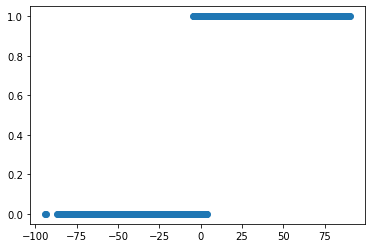

In [6]:
z = b + X @ w
plt.scatter(z, y)
z_hat = b_hat + X @ w_hat
z_hat = np.sort(z_hat)
y_hat = 1 / (1 + np.exp(-z_hat))
plt.plot(z_hat, y_hat, color='red')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(penalty=None).fit(X, y)
print('bias:', clf.intercept_)
print('weights:', clf.coef_)

NameError: name 'LogisticRegression' is not defined